<a href="https://colab.research.google.com/github/shivaprajapati34390-netizen/ML-project/blob/main/Classification_with_Neural_Networks_using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
fashion=keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=fashion.load_data()

In [ ]:
# lets have look at the sample images

image label: 5


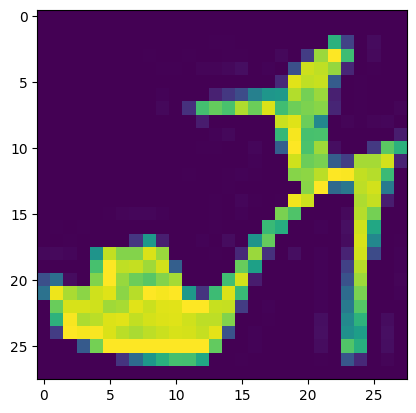

In [ ]:
from matplotlib import image
imgindex=9
image_data=xtrain[imgindex]
print("image label:",ytrain[imgindex])
plt.imshow(image_data)

In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# now i will build the neural network architecture with two hidden layers

In [ ]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")

])
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# before training our data we will split into test size

In [ ]:
xvalid,xtrain=xtrain[:5000]/255.0,xtrain[5000:]/255.0
yvalid,ytrain=ytrain[:5000],ytrain[5000:]

In [ ]:
# training a classification model with neural network

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history=model.fit(xtrain,ytrain,epochs=30,
                  validation_data=(xvalid,yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6794 - loss: 1.0216 - val_accuracy: 0.8110 - val_loss: 0.5350
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8235 - loss: 0.5102 - val_accuracy: 0.8432 - val_loss: 0.4570
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8416 - loss: 0.4537 - val_accuracy: 0.8588 - val_loss: 0.4203
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8509 - loss: 0.4271 - val_accuracy: 0.8672 - val_loss: 0.3953
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8601 - loss: 0.4022 - val_accuracy: 0.8468 - val_loss: 0.4289
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8626 - loss: 0.3882 - val_accuracy: 0.8664 - val_loss: 0.3878
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8698 - loss: 0.3664 - val_accuracy: 0.8718 - val_loss: 0.3663
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8717 - loss: 0.3584 -

In [25]:
# now lets have the look at the prediction



In [26]:
new=xtest[:5]
predictions=model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


### Interpreting the Predictions

In [27]:
import numpy as np

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual labels for the first 5 test images
actual_labels = ytest[:5]

# Define the class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

print("Predicted classes:", predicted_classes)
print("Actual labels:", actual_labels)

print("\nPredicted item names:")
for i, pred_class_idx in enumerate(predicted_classes):
    print(f"Image {i+1}: Predicted as {class_names[pred_class_idx]} (Class {pred_class_idx})")

print("\nActual item names:")
for i, actual_label_idx in enumerate(actual_labels):
    print(f"Image {i+1}: Actual is {class_names[actual_label_idx]} (Class {actual_label_idx})")


Predicted classes: [9 2 1 1 6]
Actual labels: [9 2 1 1 6]

Predicted item names:
Image 1: Predicted as Ankle boot (Class 9)
Image 2: Predicted as Pullover (Class 2)
Image 3: Predicted as Trouser (Class 1)
Image 4: Predicted as Trouser (Class 1)
Image 5: Predicted as Shirt (Class 6)

Actual item names:
Image 1: Actual is Ankle boot (Class 9)
Image 2: Actual is Pullover (Class 2)
Image 3: Actual is Trouser (Class 1)
Image 4: Actual is Trouser (Class 1)
Image 5: Actual is Shirt (Class 6)
